# PYTHON SKLEARN - MODEL SELECTION : Train_test_split, Cross Validation, GridSearchCV

URL : 

https://youtu.be/w_bLGK4Pteo?si=6sry7hoZaoFnDQur

https://youtu.be/VoyMOVfCSfc?si=WiSQUw4NCitAN0OY - **Cross Validation (techniques expliquées)**

## Train_test_split

In [4]:
#importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

In [5]:
#charger le jeu de données Iris et l'enregistrer dans une variable appelée iris 
iris = load_iris()

#afficher iris
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
#extraire les caractéristiques (features) du dataset
#et les enregister dans la variable X
X = iris.data

#afficher X
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
#afficher la forme du tableau des caractéristiques  
X.shape

(150, 4)

In [8]:
#extraire les cibles (labels/target) du dataset (ici ce sont les espèces de la fleur d'Iris)
y = iris.target

#afficher y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
#afficher la forme des cibles (labels/target) du dataset
y.shape

(150,)

Text(0.5, 1.0, "Répartition des espèces d'Iris")

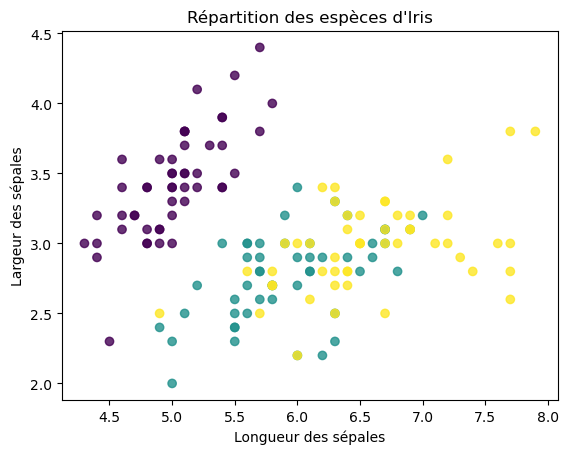

In [10]:
#créer un nuage de points avec les deux premières caractéristiques  
#X[:, 0] correspond à la première caractéristique (longueur des sépales)  
#X[:, 1] correspond à la deuxième caractéristique (largeur des sépales)  
#c=y colorie les points en fonction des classes des fleurs d'Iris  
#alpha=0.8 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

#afficher le graphique  
plt.xlabel('Longueur des sépales')  #l'axe des x
plt.ylabel('Largeur des sépales')  #l'axe des y
plt.title('Répartition des espèces d\'Iris')    #le titre du graphique

In [11]:
#créer les tableaux X_train, X_test, y_train et y_test
#en utilisant la fonction train_test_split() et les données X (features) et y (target)
#définir le pourcentage de données avec test_size=0.2
#càd 20% des données sont pour le test set et 80% des données sont pour le train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 5)

#afficher la forme de X_train
print('Train set (80% des données):', X_train.shape)

#afficher la forme de X_test
print('Test set (20% des données):', X_test.shape)

Train set (80% des données): (120, 4)
Test set (20% des données): (30, 4)


Text(0.5, 1.0, "Répartition des espèces d'Iris dans le test set")

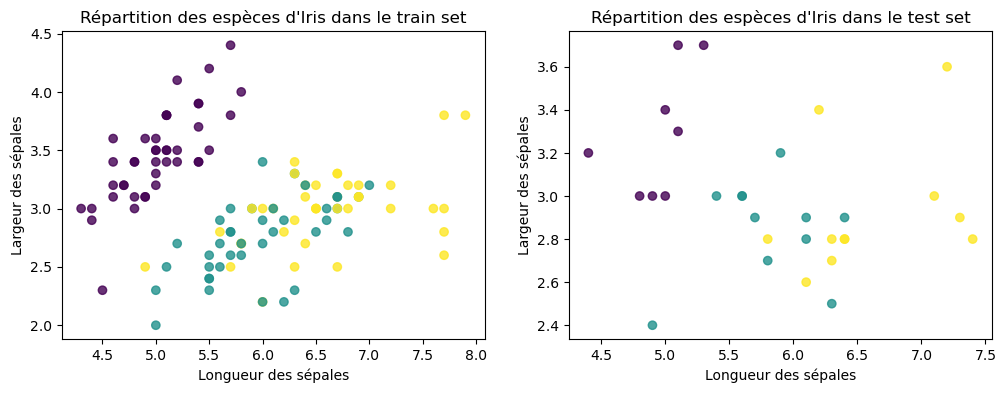

In [12]:
#créer une figure avec des dimensions personalisées
plt.figure(figsize= (12, 4))

#créer des subplots pour afficher 2 graphs
#1er graphique
plt.subplot(121)

#créer un nuage de points avec les deux premières caractéristiques de X_train 
#X_train[:, 0] correspond à la première caractéristique (longueur des sépales) de X_train
#X_train[:, 1] correspond à la deuxième caractéristique (largeur des sépales) de X_train
#c=y_train colorie les points en fonction des classes des iris de y_train
#alpha=0.8 définit l'opacité des points (plus plus c'est opaque, plus il y a de points)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)

#afficher le 1er graphique
plt.xlabel('Longueur des sépales')     #axe des x
plt.ylabel('Largeur des sépales')      #axe des y
plt.title('Répartition des espèces d\'Iris dans le train set')   #titre du graphique

#2ème graphique
plt.subplot(122)

#créer un nuage de points avec les deux premières caractéristiques de X_test 
#X_train[:, 0] correspond à la première caractéristique (longueur des sépales) de X_test
#X_train[:, 1] correspond à la deuxième caractéristique (largeur des sépales) de X_test
#c=y_test colorie les points en fonction des classes des iris de y_test
#alpha=0.8 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)

#afficher le 2ème graphique  
plt.xlabel('Longueur des sépales')     #axe des x 
plt.ylabel('Largeur des sépales')     #axe des y
plt.title('Répartition des espèces d\'Iris dans le test set')   #titre du graphique

In [13]:
#créer un modèle de KNeighborsClassifier()
#en fixant le nombre de voisins à 1
model= KNeighborsClassifier(n_neighbors=1)

#entrainer le modèle
model.fit(X_train, y_train)

#afficher le score
print('Train score:', model.score(X_train, y_train))

Train score: 1.0


In [14]:
#le score est de 100%
#ça ne veut pas dire que le modèle réussira à 100% les prèdictions dans le futur
#pour avoir une idée de la performance future du modèle, il le faut l'évaluer sur les données du test set
# càd les données qu'il n'a jamais vu

In [15]:
#afficher le score de l'évaluation à l'aide du test set
print('Test score:', model.score(X_test, y_test))

Test score: 0.9


## Validation set : améliorer le modèle

In [17]:
#pour améliorer la performance du modèle, on change le n_neighbors
#(n_neighbors=3)

#créer un modèle de KNeighborsClassifier()
#en fixant le nombre de voisins à 3
model= KNeighborsClassifier(n_neighbors=3)

#entrainer le modèle
model.fit(X_train, y_train)

#afficher les scores
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.975
Test score: 0.9333333333333333


In [18]:
#il y a une amélioration du est score
# 0.93 > 0.9

In [19]:
#pour améliorer la performance du modèle, on change le n_neighbors
#(n_neighbors=6)

#créer un modèle de KNeighborsClassifier()
#en fixant le nombre de voisins à 6
model= KNeighborsClassifier(n_neighbors=6)

#entrainer le modèle
model.fit(X_train, y_train)

#afficher les scores
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.9833333333333333
Test score: 0.9666666666666667


In [20]:
#il y a une amélioration du est score
# 0.96 > 0.93 > 0.9

In [21]:
"""
- Le réglage du modèle:

Si on règle le modèle en utilisant le test set (comme on est en train de faire), alors on ne pourra plus utiliser ces données (du test set)
pour faire l'évaluation finale du modèle.
Pour évaluer un modèle, il faut le soummettre à des données qu'il n'a jamais vu.
Si on règle le modèle sur les données du test set, alors il aura vu ces données, puisqu'il est réglé dessus.
Pour cette raison, on découpe une 3ème partie du dataset, on l'appelle le validation set (val set).
Le validation set, permet de régler le modèle tout en gardant de côté les données du test set,
pour évaluer la machine sur des données qu'elle n'aura jamais vu.

- Comment utiliser le validation set et le test set:

Quand on veut comparer 2 modèles de ML, par exp un KNeighborsClassifier avec n_neighbors=3 et un autre avec n_neighbors=6,
on entraine les 2 modèles sur le train set, puis sur le validation set,
ensuite on selectionne celui qui aura la meilleure peformance sur le validation set,
on pourra enfin évaluer ce modèle sur le test set (afin d'avoir une idée de sa performance dans la vraie vie).
"""

"\n- Le réglage du modèle:\n\nSi on règle le modèle en utilisant le test set (comme on est en train de faire), alors on ne pourra plus utiliser ces données (du test set)\npour faire l'évaluation finale du modèle.\nPour évaluer un modèle, il faut le soummettre à des données qu'il n'a jamais vu.\nSi on règle le modèle sur les données du test set, alors il aura vu ces données, puisqu'il est réglé dessus.\nPour cette raison, on découpe une 3ème partie du dataset, on l'appelle le validation set (val set).\nLe validation set, permet de régler le modèle tout en gardant de côté les données du test set,\npour évaluer la machine sur des données qu'elle n'aura jamais vu.\n\n- Comment utiliser le validation set et le test set:\n\nQuand on veut comparer 2 modèles de ML, par exp un KNeighborsClassifier avec n_neighbors=3 et un autre avec n_neighbors=6,\non entraine les 2 modèles sur le train set, puis sur le validation set,\nensuite on selectionne celui qui aura la meilleure peformance sur le valida

- **Mais comment savoir si on a fait un bon découpage du dataset pour entrainer le modèle et l'évaluer? Comment être sûr du modèle le plus performant?**

- Il existe une solution face à cette question : **la cross validation.**

## Cross validation

https://youtu.be/VoyMOVfCSfc?si=WiSQUw4NCitAN0OY - **Cross Validation (techniques expliquées)**

- Évaluation du classificateur KNN avec une validation croisée à 5 plis en utilisant la précision comme métrique de performance

In [27]:
#cross validaton avec KNeighborsClassifier() et les données X_train et y_train
#cv=5 représente le nombre de splits (plis)
#scoring= 'accuracy' représente le métric utilisé pour évaluer le modèle
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring= 'accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [28]:
#on obtient 5 scores pour les 5 splits (plis) de la cross validation

**Explication**
- **cross_val_score :** Cette fonction est utilisée pour évaluer la performance d'un modèle par validation croisée. Cela signifie que le jeu de données est divisé en plusieurs sous-ensembles (ou "splits" ou "plis"), et le modèle est entraîné et testé plusieurs fois, chaque fois en utilisant un pli différent pour les tests.
- **KNeighborsClassifier() :** C'est l'instanciation du classificateur des k plus proches voisins (KNN), un algorithme couramment utilisé pour des tâches de classification.
- **X_train et y_train :** Ce sont respectivement les caractéristiques (features) et les étiquettes (labels/target) des données d'entraînement. X_train contient les données à partir desquelles le modèle apprend, tandis que y_train contient les classes ou catégories correspondantes (ici ce sont les espèces de la fleur d'Iris).
- **cv=5 :** Indique que la validation croisée doit se faire en 5 plis, ce qui signifie que le modèle sera entraîné et testé 5 fois, chaque fois avec un pli différent comme ensemble de test.
- **scoring='accuracy' :** Cela spécifie que la métrique d'évaluation pour la performance du modèle sera la précision. La précision est le rapport entre le nombre de prédictions correctes et le nombre total de prédictions.

In [30]:
#on calcule la moyenne des 5 scores obtenus
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring= 'accuracy').mean()

0.9833333333333334

**On peut maintenant évaluer différents modèles pour retenir celui qui a la meilleure performance. En changeant la valeur de n_neighbors**

In [32]:
#on calcule la moyenne des 5 scores
#avec n_neighbors= 1
cross_val_score(KNeighborsClassifier(1), X_train, y_train, cv=5, scoring= 'accuracy').mean()

0.975

In [33]:
#on obtient un score de 97%

In [34]:
#on calcule la moyenne des 5 scores
#avec n_neighbors= 2
cross_val_score(KNeighborsClassifier(2), X_train, y_train, cv=5, scoring= 'accuracy').mean()

0.9666666666666668

In [35]:
#on calcule la moyenne des 5 scores
#avec n_neighbors= 3
cross_val_score(KNeighborsClassifier(3), X_train, y_train, cv=5, scoring= 'accuracy').mean()

0.975

In [36]:
#on calcule la moyenne des 5 scores
#avec n_neighbors= 4
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv=5, scoring= 'accuracy').mean()

0.9666666666666668

Text(0.5, 1.0, 'Validation croisée pour KNN')

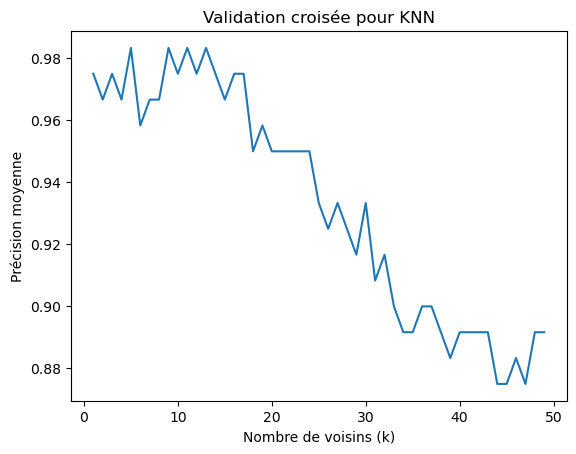

In [37]:
#pour aller plus vite, on peut utiliser une boucle for
val_score= []
#cette liste vide sert à stocker les scores de validation pour chaque valeur de k

#boucle for pour Tester les valeurs de k
#la boucle parcourt les valeurs de k de 1 à 49
#chaque valeur de k correspond au nombre de voisins (n_neighbors=k) dans l'algorithme KNN
for k in range(1, 50):  
    #calculer la précision moyenne à l'aide de la validation croisée pour chaque valeur de k  
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean()  
    val_score.append(score)
#à chaque itération, le modèle KNN est entraîné avec la valeur k actuelle.
#la précision moyenne est calculée à l'aide de cross_val_score et est ajoutée à la liste val_score.

# le tracé des scores de validation (val_score) en fonction des valeurs de k (range(1, 50))
plt.plot(range(1, 50), val_score)

#configurations des axes
plt.xlabel('Nombre de voisins (k)')  #axe des x
plt.ylabel('Précision moyenne')      #axe des y
plt.title('Validation croisée pour KNN')    #titre du graphique

In [38]:
# on déduit la meilleure performance en choisissant la bonne valeur de k càd aux alentours de 10
#qui correspond à un score de 98%

Dans SKlearn, il y a une fonction qui perrmet de créer ce graphique (sans avoir à utiliser la boucle for): **La validation curve.**

## Validation curve

En général, on a la formule:
**validation_curve(modèle, X_train, y_train, param_name='hyperparamètre', param_range=valeurs, cv=5)**
- **modèle:** le modèle utilisé (ici on a KNeighborsClassifier()).
- **X_train, y_train:** sont les données de l'entainement (train set).
- **param_name='hyperparamètre':** **écris en chaîne de caractères**, est l'hyperparamètre du modèle qu'on est en train de régler (ici c'est n_neighbors=k).
- **param_range=valeurs:** sous forme d'itérateur, on seclectionne les différentes valeurs de l'hyperparamètre qu'on veut tester(ici c'est un tableau numpy allant de 1 à 49, np.arange(1,50)).
- **cv=5:** est le nombre de splits (plis).

In [42]:
#application
#le modèle KNN
model= KNeighborsClassifier()
# les valeurs de k (nombre de voisins/n_neighbors)
k = np.arange(1,50)

#le calcul des scores d'entraînement et de validation pour chaque valeur de k  
#train_score: Liste des scores d'entraînement.
#val_score: Liste des scores de validation.
train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

In [43]:
#les scores de la cross validation (val_score)
val_score

array([[1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [0.95833333, 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.91666667, 1.

In [44]:
#sa forme
val_score.shape

(49, 5)

In [45]:
#les 49 lignes représentent les valeurs de n_neighbors testées
#les 5 colonnes représentent les nombres de splits (plis) cv=5

In [46]:
#calculer la moyennes de val_score, selon chaque ligne (axis=1)
val_score.mean(axis=1)

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.93333333,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

Text(0.5, 1.0, 'Validation croisée pour KNN')

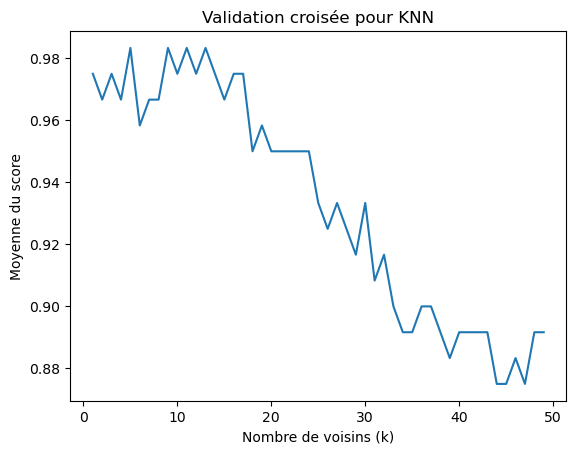

In [47]:
#afficher le graphique val_score en fonction des valeurs de k
plt.plot(k, val_score.mean(axis=1)) #k en abscisses, et la moyennes des scores val_score en ordonnées

#configurations des axes
plt.xlabel('Nombre de voisins (k)')  #axe des x (les abscisses)
plt.ylabel('Moyenne du score')      #axe des y (les ordonnées)
plt.title('Validation croisée pour KNN')    #titre du graphique

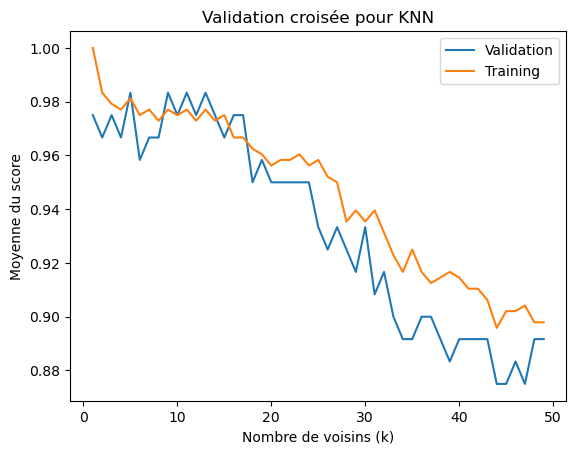

In [48]:
#pour voir aussi les scores du train set (train_score) dans le même graphique
#afficher le graphique de la moyenne de val_score en fonction des valeurs de k
#k en abscisses, et la moyennes des scores val_score en ordonnées
plt.plot(k, val_score.mean(axis=1), label= 'Validation')

#afficher le graphique de la moyenne de train_score en fonction des valeurs de k
#k en abscisses, et la moyennes des scores train_score en ordonnées
plt.plot(k, train_score.mean(axis=1), label= 'Training')

#configurations des axes 
plt.xlabel('Nombre de voisins (k)')  #axe des x (les abscisses)
plt.ylabel('Moyenne du score')      #axe des y (les ordonnées)
plt.title('Validation croisée pour KNN')    #titre du graphique
plt.legend()    #ajouter une légende

In [49]:
#On déduit qu'on peut avoir 98% de performance en choisissant la bonne valeur de k càd environ 10

- Dans l'algorithme KNN, il existe d'autres paramètres que n_neighbors (le nombre de voisins). On a, comme exemples, le type de distance (distance de Manhattan ou distance euclidienne), on peut aussi choisir d'accorder, ou non, des coefficients sur les distances.

**En réglant ces hyper-paramètres**, on peut, peut-être, avoir **une meilleure performance**.

Pour tester toutes ces combinaisons, on utilise **GridSearchCV**.

## GridSearchCV

GridSearchCV permet de trouver le modèle avec les meilleurs hyper-paramètres en comparant les différentes performances de chaque combinaison grâce à la technique de cross-validation.

- Sa formule:
**Grid= GridSearchCV(modèle, param_grid, cv)**

**Application:**

Utiliser GridSearchCV pour effectuer une recherche d'hyperparamètres sur le classificateur KNeighborsClassifier, en testant différentes valeurs pour le nombre de voisins (n_neighbors) et les métriques de distance (metric):

In [53]:
#créer un dictionnaire (une grille) qui contient les différents paramètres à régler
#ici, n_neighbors varie de 1 à 19 et metric prend les valeurs 'euclidean' et 'manhattan'.
param_grid = {
    'n_neighbors' : np.arange(1,20),
    'metric' : ['euclidean', 'manhattan']
}

#initialiser GridSearchCV
#cv=5 signifie une cross validation à 5 splits
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [54]:
#au final, on a une grille qui contient plusieurs estimateurs

In [55]:
#entraîner cette grille avec la méthode fit()
#en passant les données du train set
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [56]:
#une fois l'entraînement terminé
#on peut voir le modèle qui a eu le meilleur score
#et donc les meilleurs hyperparamètres trouvés par la recherche de grille et le score correspondant:
print("Meilleurs paramètres :", grid.best_params_)  
print("Meilleur score :", grid.best_score_)

Meilleurs paramètres : {'metric': 'euclidean', 'n_neighbors': 5}
Meilleur score : 0.9833333333333334


In [57]:
#enregistrer le modèle dqns la variable model
model = grid.best_estimator_

In [58]:
#Le modèle est ensuite évalué sur les données (l'ensemble de test) X_test et y_test
#pour obtenir une estimation de performance dans la vraie vie
test_score = grid.score(X_test, y_test)

#afficher le score sur l'ensemble de test
print("Score sur l'ensemble de test :", test_score)

Score sur l'ensemble de test : 0.9333333333333333


- On peut ensuite utiliser une autre mesure pour évaluer la performance du modèle.

On peut, par exemple, utiliser **la confusion matrix** pour montrer **les erreurs** (de classement) dans le modèle**.

In [60]:
#on utilise le modèle pour prédire les classes sur les données de test
y_pred = model.predict(X_test)

#calculer la matrice de confusion en comparant les vraies étiquettes avec celles prédites
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

**Interprétation de la Matrice de Confusion (cm):**

On obtient une matrice carrée:

- **Les lignes** de la matrice de confusion **représentent les classes vraies**, tandis que les **colonnes représentent les classes prédites**.
- Chaque entrée (cm[i][j]) dans la matrice indique le nombre d'observations de la classe réelle i qui ont été prédites comme appartenant à la classe j.
- **Un modèle parfait aura toutes ses prédictions sur la diagonale (c’est-à-dire que toutes les prévisions sont correctes).**

In [62]:
'''
ici, on a:
une matrice carrée de dimensions 3x3 pcq'on a 3 espèces de fleurs d'Iris dans le dataset.
- Les lignes:
1ère ligne: classe 1 (ou 1ère classe) dans la vraie fleur
2ème ligne: classe 2 dans la vraie fleur
3ème ligne: classe 3 dans la vraie fleur

- Les colonnes:
1ère colonne: classe 1 dans la prédiction
2ème colonne: classe 2 dans la prédiction
3ème colonne: classe 3 dans la prédiction

Dans l'expemple, on a:

* 1ère ligne:
les 8 fleurs (de la classe 1 de la vraie fleur) sont bien rangées dans la 1ère classe de la prédiction
(bonne prédiction de la classe des fleurs)

* 2ème ligne:
parmi les 11 fleurs de la 2ème classe, 9 sont bien classées dans la classe 2
et 2 sont classés dans la classe 3 dans la prédiction

* 3ème ligne:
les 11 fleurs (de la classe 1 de la vraie fleur) sont bien rangées dans la 1ère classe de la prédiction
(bonne prédiction de la classe des fleurs)
'''

"\nici, on a:\nune matrice carrée de dimensions 3x3 pcq'on a 3 espèces de fleurs d'Iris dans le dataset.\n- Les lignes:\n1ère ligne: classe 1 (ou 1ère classe) dans la vraie fleur\n2ème ligne: classe 2 dans la vraie fleur\n3ème ligne: classe 3 dans la vraie fleur\n\n- Les colonnes:\n1ère colonne: classe 1 dans la prédiction\n2ème colonne: classe 2 dans la prédiction\n3ème colonne: classe 3 dans la prédiction\n\nDans l'expemple, on a:\n\n* 1ère ligne:\nles 8 fleurs (de la classe 1 de la vraie fleur) sont bien rangées dans la 1ère classe de la prédiction\n(bonne prédiction de la classe des fleurs)\n\n* 2ème ligne:\nparmi les 11 fleurs de la 2ème classe, 9 sont bien classées dans la classe 2\net 2 sont classés dans la classe 3 dans la prédiction\n\n* 3ème ligne:\nles 11 fleurs (de la classe 1 de la vraie fleur) sont bien rangées dans la 1ère classe de la prédiction\n(bonne prédiction de la classe des fleurs)\n"

## Learning curve(s)

La courbe d'apprentissage montre l'évolution de la performance du modèle en fonction de la quantité de données qu'on lui fournit.

Typiquement, plus il y a de données, meilleure sera la performance du modèle. Mais la performance finit toujours par atteindre un plafond et ne peut plus être améliorée, et quand c'est le cas, c'est inutile d'avoir plus de données.

Sa formule: **learning_curve(model, X, y, train_sizes, cv=5)**

In [65]:
#train_sizes:les tailles d'échantillon d'entraînement utilisées pour évaluer le modèle
#0.2, 0.4, 0.6, 0.8, et 1.0 représentent 20% , 40%, 60%, 80% et 100%
train_sizes=np.linspace(0.2, 1.0, 5)

#afficher train_sizes
train_sizes

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [66]:
#train_sizes:les tailles d'échantillon d'entraînement utilisées pour évaluer le modèle
#train_scores et val_scores:les scores de précision pour les ensembles d'entraînement et de validation
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 5), cv=5)

#afficher les tailles d'échantillon utilisées dans l'évaluation
print("Tailles d'entraînement :", N)

#afficher les scores d'entraînement et de validation moyens pour chaque taille d'échantillon
print("Scores d'entraînement moyens :", train_score.mean(axis=1))  
print("Scores de validation moyens :", val_score.mean(axis=1))

Tailles d'entraînement : [19 38 57 76 96]
Scores d'entraînement moyens : [0.98947368 1.         0.99649123 0.98684211 0.98125   ]
Scores de validation moyens : [0.95833333 0.98333333 0.98333333 0.975      0.98333333]


In [67]:
"""
Tailles d'entraînement : [0.2 0.4 0.6 0.8 1. ]

signifie que, si le dataset contient 100 exemples de fleurs, alors on aura:

20 points pour le 1er lot.
40 points pour le 2ème lot.
60 points pour le 3ème lot.
80 points pour le 4ème lot.
100 points pour le 5ème lot.

Ces différentes quantitées sont retrouvées dans la variable N qui est retournée par la fonction learning_curve().
En ce cas, on voit que si on découpe X_train et y_train avec ces pourcentages, on obtiendra dans:

-le 1er lot, 19 points
-le 2ème lot, 38 points
-le 3ème lot, 57 points
-le 4ème lot, 76 points
-le 5ème lot, 96 points
"""

"\nTailles d'entraînement : [0.2 0.4 0.6 0.8 1. ]\n\nsignifie que, si le dataset contient 100 exemples de fleurs, alors on aura:\n\n20 points pour le 1er lot.\n40 points pour le 2ème lot.\n60 points pour le 3ème lot.\n80 points pour le 4ème lot.\n100 points pour le 5ème lot.\n\nCes différentes quantitées sont retrouvées dans la variable N qui est retournée par la fonction learning_curve().\nEn ce cas, on voit que si on découpe X_train et y_train avec ces pourcentages, on obtiendra dans:\n\n-le 1er lot, 19 points\n-le 2ème lot, 38 points\n-le 3ème lot, 57 points\n-le 4ème lot, 76 points\n-le 5ème lot, 96 points\n"

Tailles d'entraînement : [ 9 19 28 38 48 57 67 76 86 96]
Scores d'entraînement moyens : [0.91111111 0.98947368 1.         1.         0.99583333 0.99649123
 0.98507463 0.98684211 0.97674419 0.98125   ]
Scores de validation moyens : [0.68333333 0.95833333 0.98333333 0.98333333 0.975      0.98333333
 0.975      0.975      0.98333333 0.98333333]


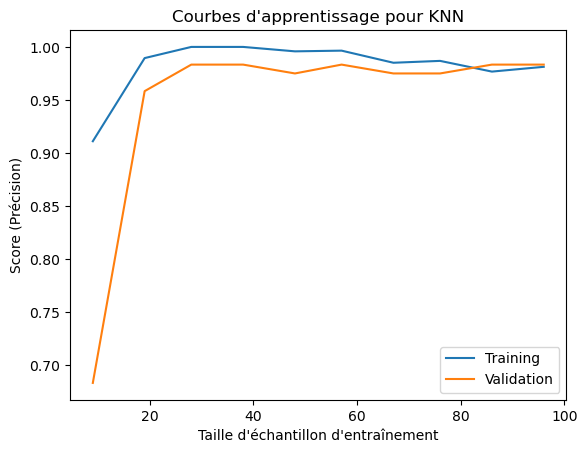

In [68]:
#train_sizes:les tailles d'échantillon d'entraînement utilisées pour évaluer le modèle
#train_scores et val_scores:les scores de précision pour les ensembles d'entraînement et de validation
#train_sizes=np.linspace(0.1, 1.0, 10)
#train_sizes définit 10 tailles échantillonnées linéairement entre 10% et 100% de l'échantillon d'entraînement total

#calculer les courbes d'apprentissage  
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

#afficher les tailles d'échantillon utilisées dans l'évaluation.
print("Tailles d'entraînement :", N)

#afficher les scores d'entraînement et de validation moyens pour chaque taille d'échantillon
print("Scores d'entraînement moyens :", train_score.mean(axis=1))  
print("Scores de validation moyens :", val_score.mean(axis=1))

plt.plot(N, train_score.mean(axis=1), label= 'Training')  #1ère courbe du training

plt.plot(N, val_score.mean(axis=1), label= 'Validation')  #2ème courbe de la validation

#configurations des axes  
plt.xlabel('Taille d\'échantillon d\'entraînement')  #étiquette de l'axe des x  
plt.ylabel('Score (Précision)')  #étiquette de l'axe des y  
plt.title('Courbes d\'apprentissage pour KNN')  #titre du graphique  
plt.legend()  #afficher la légende pour les courbes

In [69]:
#on voit que la performance du modèle ne s'améliore plus à partie du moment où on a environ 60 points dans le dataset
#il est peu probable qu'on aura des meilleures performances en ayant 100, 200, ou 1000 points ( dans le dataset)
#c'est important à savoir pcq c'est cher de récolter des informations (pour le dataset)
#on ne veut pas sépenser de l'argent pour rien!

**L'utilité des Courbes d'Apprentissage:**

Les courbes d'apprentissage montrent comment un modèle apprend à partir d'un nombre croissant de données d'entraînement. En observant ces courbes :

- **Overfitting (sur-apprentissage) :** Si le **score d'entraînement est élevé** tandis que le **score de validation est faible à des tailles d'échantillon élevées**, cela indique que le modèle est trop complexe et s'adapte trop aux données d'entraînement.
- **Underfitting (sous-apprentissage) :** Si **les deux scores sont faibles**, le modèle est probablement trop simple pour saisir les tendances sous-jacentes des données.